# Лабораторная работа №2.3.3

## Измерение осмотического давления

## Подлкючение библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import math

from scipy.optimize import curve_fit

In [82]:
def Line(x, a, b):
    """
    Параметрическая прямая
    """
    return a*x + b

#-----------------------------------------------------------------------------------------------------------
#
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ВНИМАНИЕ !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#
# Тупой питон не может подставить знак минус перед коэффициентом b! Если экспонента имеет вид e(^b), b < 0,
# то минус надо указать вручную.
#
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#
#-----------------------------------------------------------------------------------------------------------
def Exponent(x, a, b, c):
    """
    Параметрическая експонента (ae^(bx)
    """
    return a * np.exp(-b * x) + c

def CalcErrors(popt, cov, precA = 4, precB = 4):
    """
    Вычисляет погрешность МНК.
    Выводит в консоль значения + погрешность.
    Возвращает массив погрешностей.
    """
    errors = []
    for i in range(len(popt)):
        try:
          errors.append(np.absolute(cov[i][i])**0.5)
        except:
          errors.append( 0.00 )
    errors = np.array(errors)

    print("a = {:.0{prec}f} sig_a = {:.0{prec}f}".format(popt[0], errors[0], prec = precA))
    print("b = {:.0{prec}f} sig_b = {:.0{prec}f}".format(popt[1], errors[1], prec = precB), '\n')

    return errors

def NpToStrList(np_array, precision):
    np_array = np.around(np_array.astype(float), precision)

    return ["{:.0{prec}f}".format(val, prec = precision) for val in np_array]

def NpToStr(array):
    return [str(f) for f in array]

def PrintMinMax(array, header):
    print(header + "min = {:.3f}, max = {:.3f}".format(min(array), max(array)))

## Данные

In [46]:
sig_t = 0.5
sig_h = 0.5

sig_P = 0.5

k = 1.38 * 10**-23

T = 300

V = 150 * 10**-6
ro_water = 1000
m = ro_water * V

mu_salt = 4 * 

In [47]:
sheet_names = ["3%", "1,5%", "0,75%"]
h_t_count   = [6, 5, 5]

data = pd.read_excel('data/data 2.3.3.ods',
                     engine = "odf",
                     header = None,
                     index_col = None,
                     sheet_name = sheet_names,
                     usecols = "A:AI")

n = [0.03, 0.015, 0.0075]

In [107]:
class Exp:
    
    def __init__(self, n, data, h_t_count):
        self.n = n
        self.h = []
        self.t = []
        
        self.P = []
        self.v = []
        
        self.popt_h_t = []
        self.pcov_h_t = []
        
        for i in range(0, h_t_count):
            p = data[0 + 6 * i][2  ]
            h = data[4 + 6 * i][2 :]
            t = data[3 + 6 * i][2 :]
            
            h = np.array(h).astype(float)
            t = np.array(t).astype(float)
            
            h = h[~np.isnan(h)]
            t = t[~np.isnan(t)]
                        
            self.P.append(p)
            self.h.append(h)
            self.t.append(t)
            
            popt_h_t, pcov_h_t = curve_fit(Line, t, h)
            
            self.popt_h_t.append(popt_h_t)
            self.pcov_h_t.append(pcov_h_t)
            
            v = popt_h_t[0]
            
            self.v.append(v)
            
        self.v = np.array(self.v).astype(float)
        self.P = np.array(self.P).astype(float)
        
        if (n == 0.03):
            self.popt_v_p, self.pcov_v_p = curve_fit(Line, self.P[[0,1,2]], self.v[[0,1,2]])
        else:
            self.popt_v_p, self.pcov_v_p = curve_fit(Line, self.P, self.v)
        
        self.err_v_p = CalcErrors(self.popt_v_p, self.pcov_v_p)
        
        self.sig_v = self.v * self.err_v_p[0]
        
        self.Posm = -self.popt_v_p[1] / self.popt_v_p[0] # v = aP + b. Posm = -b / a
        
        self.m_salt = self.n * m
        self.
        self.Posm_calc = self.n * k * T

In [108]:
exps = []
Posm = []

for index in range (0, len(sheet_names)):
    sheet_name = sheet_names[index]
    
    exp = Exp(n[index], data[sheet_name], h_t_count[index])
    
    """
    print('n = {:.2f}%\n'.format(n[index]))
    
    for st in range(0, h_t_count[index]):
        PrintMinMax(exp.h[st], "p = {:.0f} h. ".format(exp.P[st]))
        PrintMinMax(exp.t[st], "p = {:.0f} t. ".format(exp.P[st]))
        
        print('')
    """
    
    exps.append(exp)

a = -0.0021 sig_a = 0.0004
b = -0.0135 sig_b = 0.0400 

a = -0.0019 sig_a = 0.0002
b = -0.0064 sig_b = 0.0344 

a = -0.0018 sig_a = 0.0001
b = 0.0574 sig_b = 0.0144 



In [ ]:
for st in range(0, len(exps)):
    
    
    print('Posm_meas = {:.3f}, Posm_calc = {:.3f}'.format(exp.Posm, ))

## Графики

In [ ]:
# Загрузка данных

_yMin = [80      , 140     , 140]
_yMax = [200.0001, 200.0001, 200.0001]

_xMin = [0       , 0       , 0]
_xMax = [600.0001, 240.0001, 360.0001]

for expIndex in range(0, len(exps)):
    exp = exps[expIndex]
    
    plotTitle       = 'График зависимости уровня в капиляре от времени $h(t)$.\nКонцентрация $n = ' +\
        str(n[expIndex] * 100) + '$'
    
    xLabel          = '$t$, с'
    yLabel          = '$h$, мм'

    concIndex = 0

    yMin            = _yMin[expIndex]
    yMax            = _yMax[expIndex]

    xMin            = _xMin[expIndex]
    xMax            = _xMax[expIndex]

    yMinorStep      = 1
    yMajorStep      = 10

    xMinorStep      = 10
    xMajorStep      = 60

    xTickMultiplier = 1
    yTickMultiplier = 1

    xPrecision      = 0
    yPrecision      = 0

    colors = ['red', 'blue', 'green', 'orange', 'violet', 'yellow']

    # Построение графика.

    mpl.rcParams['font.size'] = 16

    fig  = plt.figure(figsize = (10,10), dpi = 100)
    axes = fig.add_subplot()

    # Заголовок

    plt.title(plotTitle)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

    # Линии

    for st in range(0, h_t_count[expIndex]):
        plt.errorbar(exp.t[st], exp.h[st], xerr = sig_t, yerr = sig_h, fmt = '.', color = colors[st])

        plt.plot(exp.t[st], Line(exp.t[st], *exp.popt_h_t[st]), label = '$p = {:.0f}$ дел'.format(exp.P[st]), c = colors[st])

    # Оформление масштабных чёрточек

    if yMajorStep > 0:
        y_major_ticks = np.arange(yMin, yMax, yMajorStep)
        axes.set_yticks(y_major_ticks)

    if yMinorStep > 0:
        y_minor_ticks = np.arange(yMin, yMax, yMinorStep)
        axes.set_yticks(y_minor_ticks, minor = True)

    if xMajorStep > 0:
        x_major_ticks = np.arange(xMin, xMax, xMajorStep)
        axes.set_xticks(x_major_ticks)

    if xMinorStep > 0:
        x_minor_ticks = np.arange(xMin, xMax, xMinorStep)
        axes.set_xticks(x_minor_ticks, minor = True)

    # Пределы графика

    plt.xlim([xMin, xMax])
    plt.ylim([yMin, yMax])

    # Форматирование чёрточек

    def xTickFormatter(tickVal, position):
        return "{:.{prec}f}".format(tickVal * xTickMultiplier, prec = xPrecision).replace('.', ',')

    def yTickFormatter(tickVal, position):
        return "{:.{prec}f}".format(tickVal * yTickMultiplier, prec = yPrecision).replace('.', ',')

    axes.xaxis.set_major_formatter(ticker.FuncFormatter(xTickFormatter))
    axes.yaxis.set_major_formatter(ticker.FuncFormatter(yTickFormatter))

    # Легенда

    plt.legend(loc = 'upper right')

    # Сетка

    plt.grid(b=True, which='major', c = 'black', alpha = 0.9)
    plt.grid(b=True, which='minor', c = 'black', alpha = 0.3)

    # Вывод
    
    plt.savefig("plots\\graph_h_t_" + str(expIndex) + ".png")
    
    plt.show()

In [83]:
for st in range(0, len(exps)):
    exp = exps[st]
    
    PrintMinMax(exp.v, "v. ")
    PrintMinMax(exp.P, "P. ")

v. min = -0.329, max = -0.128
P. min = 60.000, max = 200.000
v. min = -0.392, max = -0.146
P. min = 60.000, max = 200.000
v. min = -0.307, max = -0.056
P. min = 60.000, max = 200.000


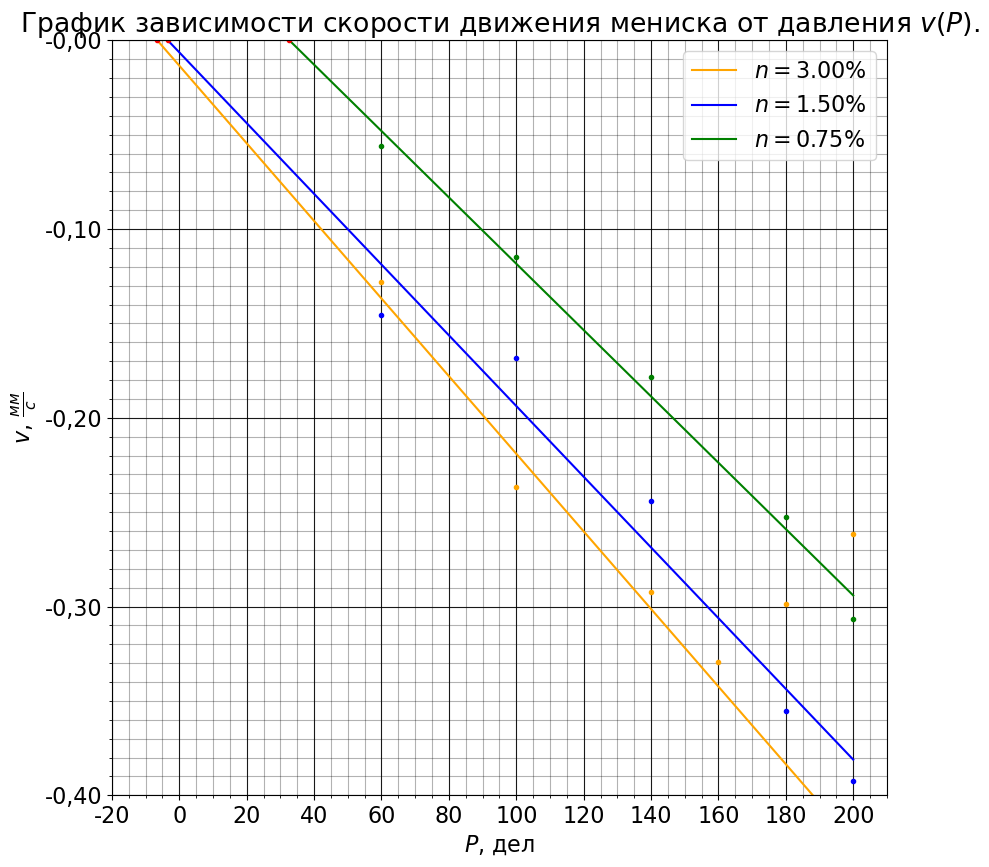

In [116]:
# Загрузка данных
plotTitle       = 'График зависимости скорости движения мениска от давления $v(P)$.'

xLabel          = '$P$, дел'
yLabel          = '$v$, $\\frac{мм}{с}$'

concIndex = 0

yMin            = -0.40001
yMax            = 0

xMin            = -20
xMax            = 210.0001

yMinorStep      = 0.01
yMajorStep      = 0.1

xMinorStep      = 5
xMajorStep      = 20

xTickMultiplier = 1
yTickMultiplier = 1

xPrecision      = 0
yPrecision      = 2

colors = ['orange', 'blue', 'green']

# Построение графика.

mpl.rcParams['font.size'] = 16

fig  = plt.figure(figsize = (10,10), dpi = 100)
axes = fig.add_subplot()

# Заголовок

plt.title(plotTitle)
plt.xlabel(xLabel)
plt.ylabel(yLabel)

# Линии

for st in range(0, len(exps)):
    exp = exps[st]
    
    P = [exp.Posm] + exp.P.tolist()
    
    P = np.array(P)
    
    plt.errorbar(exp.P, exp.v, xerr = sig_P, yerr = exp.sig_v, fmt = '.', color = colors[st])

    plt.plot(P, Line(P, *exp.popt_v_p), label = '$n = {:.2f}\\%$'.format(n[st] * 100), c = colors[st])
    
    plt.errorbar(exp.Posm, 0, xerr = sig_P, yerr = 0, fmt = '.', color = 'red')

# Оформление масштабных чёрточек

if yMajorStep > 0:
    y_major_ticks = np.arange(yMin, yMax, yMajorStep)
    axes.set_yticks(y_major_ticks)

if yMinorStep > 0:
    y_minor_ticks = np.arange(yMin, yMax, yMinorStep)
    axes.set_yticks(y_minor_ticks, minor = True)

if xMajorStep > 0:
    x_major_ticks = np.arange(xMin, xMax, xMajorStep)
    axes.set_xticks(x_major_ticks)

if xMinorStep > 0:
    x_minor_ticks = np.arange(xMin, xMax, xMinorStep)
    axes.set_xticks(x_minor_ticks, minor = True)

# Пределы графика

plt.xlim([xMin, xMax])
plt.ylim([yMin, yMax])

# Форматирование чёрточек

def xTickFormatter(tickVal, position):
    return "{:.{prec}f}".format(tickVal * xTickMultiplier, prec = xPrecision).replace('.', ',')

def yTickFormatter(tickVal, position):
    return "{:.{prec}f}".format(tickVal * yTickMultiplier, prec = yPrecision).replace('.', ',')

axes.xaxis.set_major_formatter(ticker.FuncFormatter(xTickFormatter))
axes.yaxis.set_major_formatter(ticker.FuncFormatter(yTickFormatter))

# Легенда

plt.legend(loc = 'upper right')

# Сетка

plt.grid(b=True, which='major', c = 'black', alpha = 0.9)
plt.grid(b=True, which='minor', c = 'black', alpha = 0.3)

# Вывод

plt.savefig("plots\\graph_v_p.png")

plt.show()